# **The Impact and Effectivity of Improving Operating Room’s Schedules Using Simulation**

---



**Model Development and Simulation**

- This event follows a Discrete-Event Simulation beacuse in this model, some changes might occur on distinct point of time.

Stochastic
- In an operating room, there is a randomness in the arrival and durations of surgery. You also do not know if there is a priority or not in terms of emergency.

Dynamic
- This does not remains constant over time, it evolves. The duration of surgery improves depending on the number of doctors and equipments available in the hospitals.

# **CODE**

---



In [ ]:
!pip install simpy

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

**parameters**
- *NUM_OR* - number of operating rooms
- *SIM_TIME* - simulation time in minutes (8 hours)
- *TURNOVER_TIME* - cleaning between surgeries
- *EMERGENCY_PROB* - probability of having an emergency surgery

In [ ]:
NUM_OR = 4
SIM_TIME = 600
TURNOVER_TIME = 15
EMERGENCY_PROB = 0.7
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [ ]:
surgery_counts = {
    'Elective': 0,
    'Emergency': 0
}

**surgery duration** (minutes)

In [ ]:
def get_surgery_duration(emergency=False):
    return random.randint(60, 120) if emergency else random.randint(30, 90)

**generation of surgeries** - random time on 15 to 45 mins

In [ ]:
def generate_surgeries(env, or_rooms):
    surgery_id = 0
    while True:
        yield env.timeout(random.randint(15, 45))
        emergency = random.random() < EMERGENCY_PROB
        duration = get_surgery_duration(emergency)
        env.process(perform_surgery(env, surgery_id, or_rooms, duration, emergency))
        surgery_id += 1

**process of surgery and cleaning**

In [ ]:
def perform_surgery(env, surgery_id, or_rooms, duration, emergency):
    with or_rooms.request(priority=0 if emergency else 1) as req:
        arrival_time = env.now
        yield req
        wait_time = env.now - arrival_time

        type_str = 'Emergency' if emergency else 'Elective'
        surgery_counts[type_str] += 1

        print(f"{env.now:.1f} min - Surgery {surgery_id} ({type_str}) started. Waited {wait_time:.1f} mins.")
        yield env.timeout(duration)

        print(f"{env.now:.1f} min - Surgery {surgery_id} finished. Cleaning OR...")
        yield env.timeout(TURNOVER_TIME)

**run** - there is a priority in emergencies. low no = high prio




In [ ]:
def run_simulation():
    env = simpy.Environment()
    or_rooms = simpy.PriorityResource(env, capacity=NUM_OR)
    env.process(generate_surgeries(env, or_rooms))
    env.run(until=SIM_TIME)

In [ ]:
def show_bar_chart():
    types = list(surgery_counts.keys())
    counts = list(surgery_counts.values())

    plt.figure(figsize=(10, 8))
    bars = plt.bar(types, counts, color=['skyblue', 'salmon'])
    plt.title('Number of Surgeries by Type')
    plt.ylabel('Number of Surgeries')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
if __name__ == "__main__":
    run_simulation()

35.0 min - Surgery 0 (Emergency) started. Waited 0.0 mins.
58.0 min - Surgery 1 (Emergency) started. Waited 0.0 mins.
96.0 min - Surgery 2 (Emergency) started. Waited 0.0 mins.
126.0 min - Surgery 1 finished. Cleaning OR...
139.0 min - Surgery 3 (Emergency) started. Waited 0.0 mins.
142.0 min - Surgery 0 finished. Cleaning OR...
167.0 min - Surgery 4 (Emergency) started. Waited 0.0 mins.
188.0 min - Surgery 5 (Emergency) started. Waited 0.0 mins.
203.0 min - Surgery 2 finished. Cleaning OR...
218.0 min - Surgery 6 (Emergency) started. Waited 15.0 mins.
232.0 min - Surgery 4 finished. Cleaning OR...
236.0 min - Surgery 3 finished. Cleaning OR...
247.0 min - Surgery 7 (Elective) started. Waited 9.0 mins.
260.0 min - Surgery 8 (Emergency) started. Waited 0.0 mins.
286.0 min - Surgery 5 finished. Cleaning OR...
301.0 min - Surgery 9 (Elective) started. Waited 1.0 mins.
303.0 min - Surgery 7 finished. Cleaning OR...
323.0 min - Surgery 6 finished. Cleaning OR...
337.0 min - Surgery 8 finish

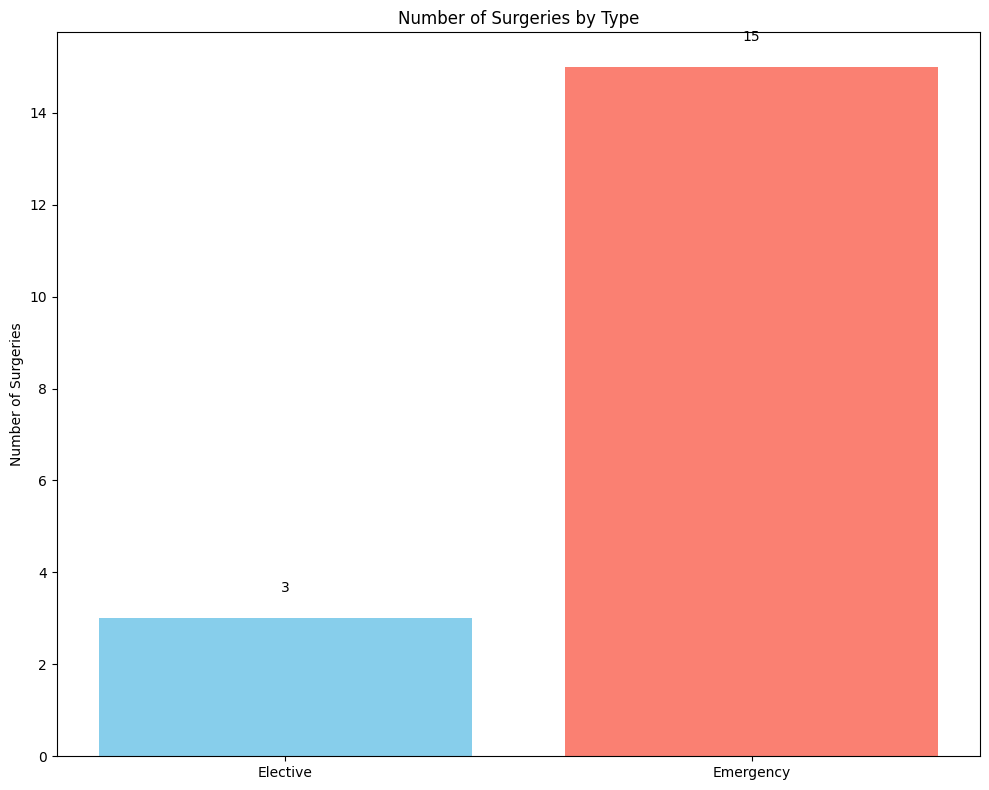

In [ ]:
if __name__ == "__main__":
    show_bar_chart()